In [2]:
import numpy as np 
import pandas as pd 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from times_series_workflow import *
from clean_data import clean

In [3]:
data=pd.read_csv("data/BTCUSDT.csv")
print(data.head(5))
print(data.tail(5))
data.dtypes
data.info()
data.describe()

       open_time      open      high       low     close     volume  \
0  1640991600000  46303.98  46467.67  46300.49  46350.44  465.18072   
1  1640993400000  46350.44  46520.13  46132.04  46216.93  520.81690   
2  1640995200000  46216.93  46527.26  46208.37  46375.42  706.65682   
3  1640997000000  46375.42  46731.39  46360.19  46656.13  796.67413   
4  1640998800000  46656.14  46949.99  46574.06  46815.33  589.50801   

      close_time           qav  num_trades  taker_base_vol  taker_quote_vol  \
0  1640993399999  2.158094e+07       13399       211.34079     9.805458e+06   
1  1640995199999  2.413883e+07       16156       272.75150     1.264373e+07   
2  1640996999999  3.275119e+07       19674       388.44942     1.800036e+07   
3  1640998799999  3.712879e+07       18934       417.61594     1.946179e+07   
4  1641000599999  2.754998e+07       18930       332.64016     1.554390e+07   

   ignore  
0       0  
1       0  
2       0  
3       0  
4       0  
           open_time      

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
count,2.471700e+04,24717.000000,24717.000000,24717.000000,24717.000000,24717.000000,2.471700e+04,2.471700e+04,2.471700e+04,24717.000000,2.471700e+04,24717.0
mean,1.663236e+12,27271.043278,27353.028148,27187.516656,27270.302776,3336.535948,1.663238e+12,7.599103e+07,7.777192e+04,1659.848870,3.778164e+07,0.0
std,1.284430e+10,8930.424817,8961.153893,8898.137126,8929.600188,3802.805929,1.284430e+10,8.080531e+07,7.643152e+04,1900.846187,4.044800e+07,0.0
min,1.640992e+12,15648.230000,15732.000000,15476.000000,15649.520000,0.000000,1.640993e+12,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0
25%,1.652114e+12,20127.060000,20199.990000,20063.290000,20127.060000,794.106600,1.652116e+12,2.614085e+07,1.950100e+04,391.081060,1.292908e+07,0.0
50%,1.663236e+12,23883.720000,23961.920000,23803.350000,23882.940000,2248.555310,1.663238e+12,5.225458e+07,5.675700e+04,1116.484330,2.594863e+07,0.0
75%,1.674358e+12,32304.580000,32577.000000,32061.290000,32289.130000,4434.472860,1.674360e+12,9.646703e+07,1.107610e+05,2196.686480,4.801427e+07,0.0
max,1.685484e+12,48118.470000,48189.840000,47835.260000,48118.480000,74378.715690,1.685486e+12,1.625288e+09,1.036001e+06,37099.582260,8.119615e+08,0.0


In [4]:
data=clean(data)

In [5]:
data.head()

,open,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol
open_time,,,,,,,,
2021-12-31 23:00:00,46303.98,46350.44,465.18072,2021-12-31 23:29:59.999,2.158094e+07,13399,211.34079,9.805458e+06
2021-12-31 23:30:00,46350.44,46216.93,520.81690,2021-12-31 23:59:59.999,2.413883e+07,16156,272.75150,1.264373e+07
2022-01-01 00:00:00,46216.93,46375.42,706.65682,2022-01-01 00:29:59.999,3.275119e+07,19674,388.44942,1.800036e+07
2022-01-01 00:30:00,46375.42,46656.13,796.67413,2022-01-01 00:59:59.999,3.712879e+07,18934,417.61594,1.946179e+07
2022-01-01 01:00:00,46656.14,46815.33,589.50801,2022-01-01 01:29:59.999,2.754998e+07,18930,332.64016,1.554390e+07


<AxesSubplot:xlabel='open_time'>

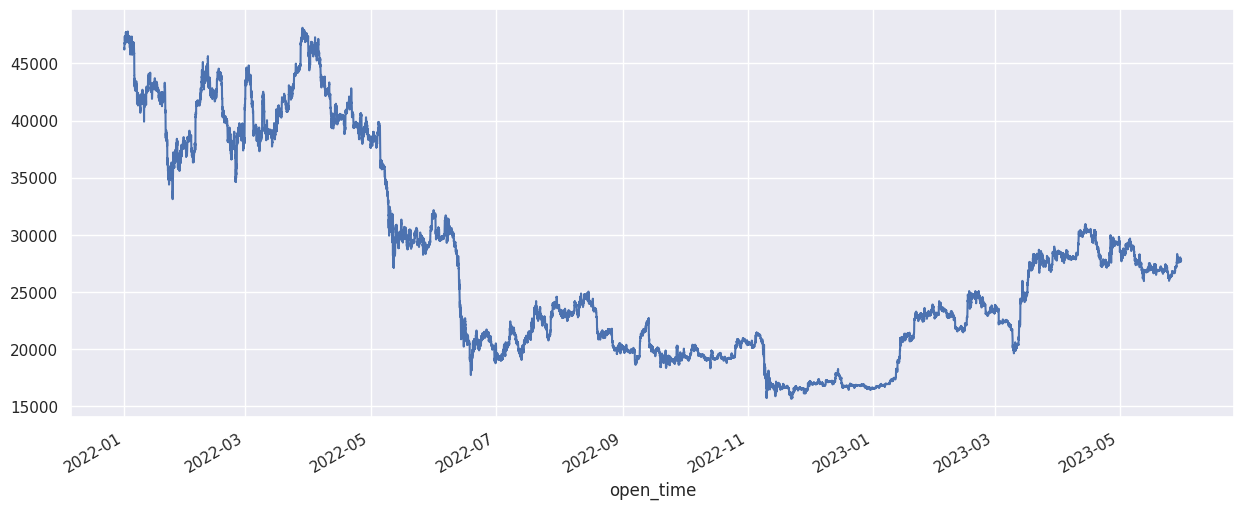

In [6]:
data['close'].plot()

In [7]:
data = data['close']

Text(0, 0.5, 'Weekly bitcoin price')

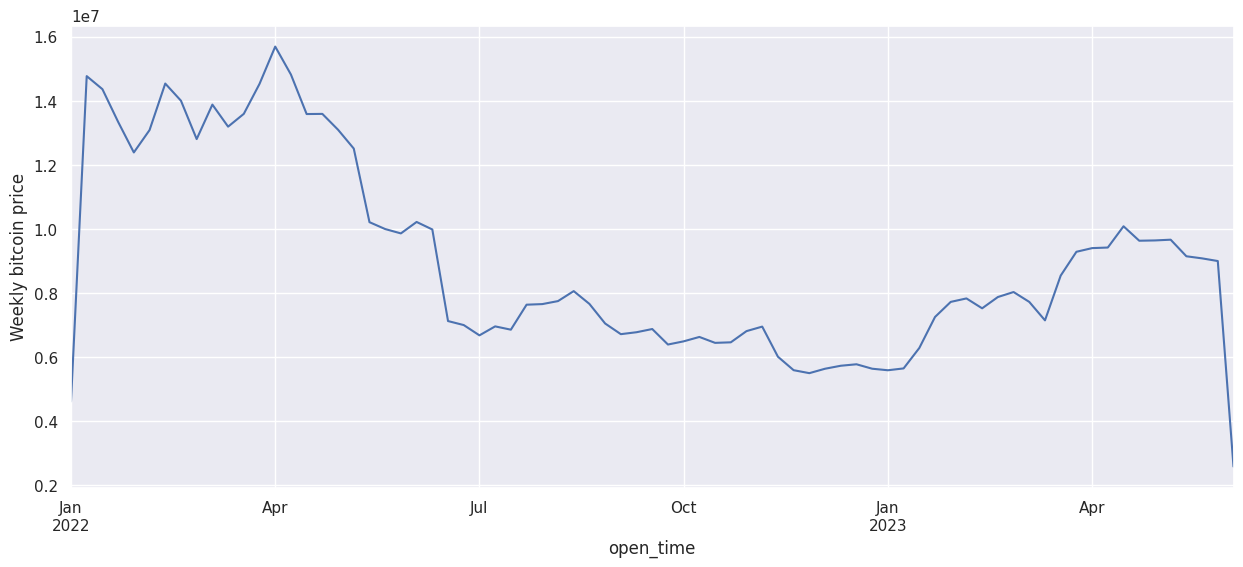

In [8]:
weekly = data.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

<AxesSubplot:xlabel='open_time'>

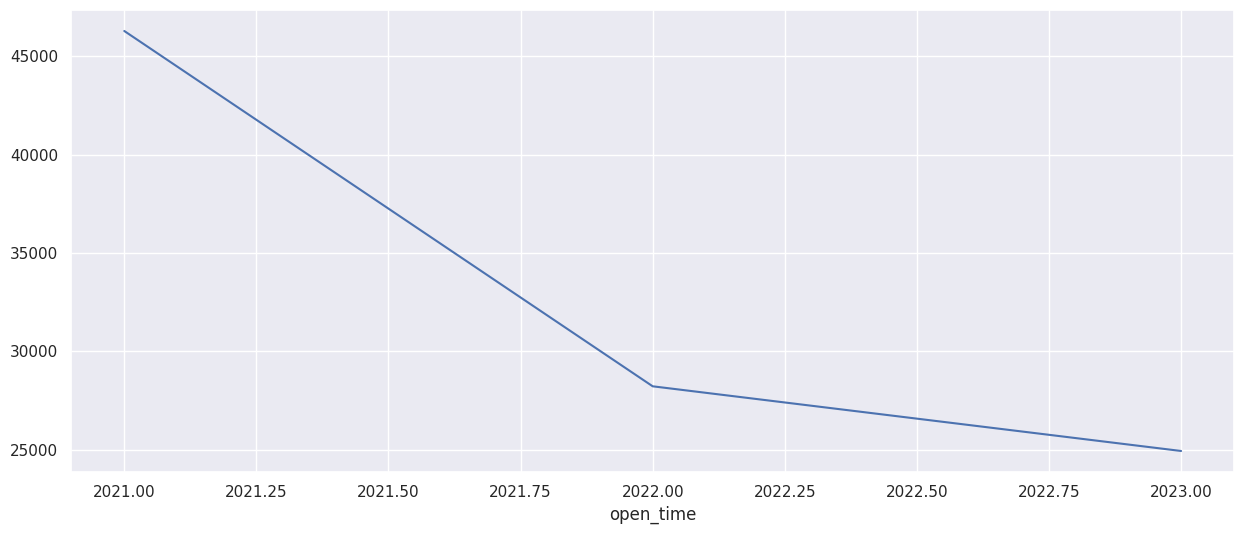

In [9]:
by_year = data.groupby(data.index.year).mean()
by_year.plot()

<AxesSubplot:>

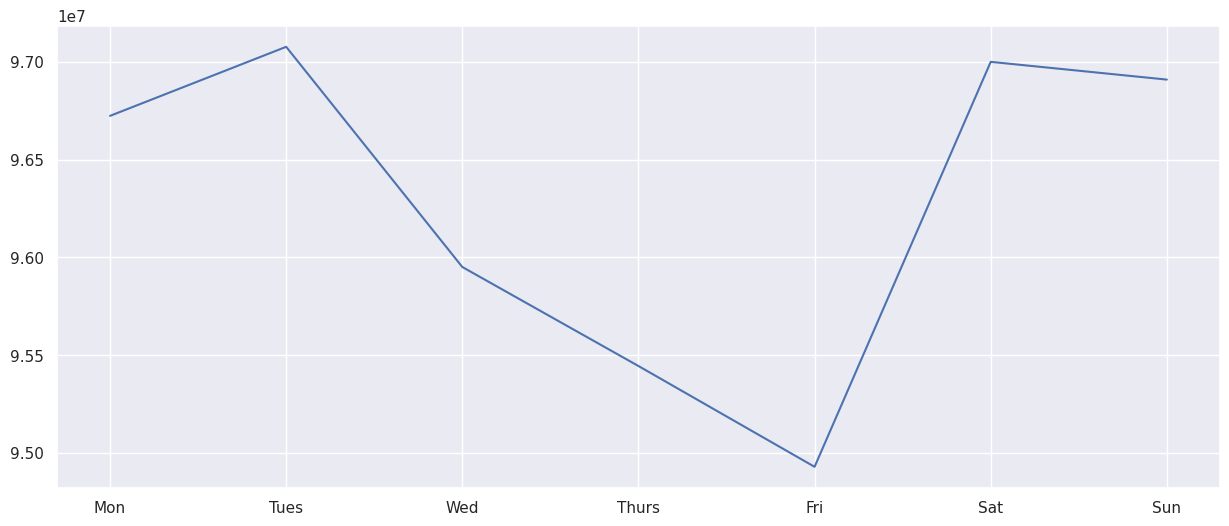

In [10]:
by_weekday = data.groupby(data.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

<AxesSubplot:>

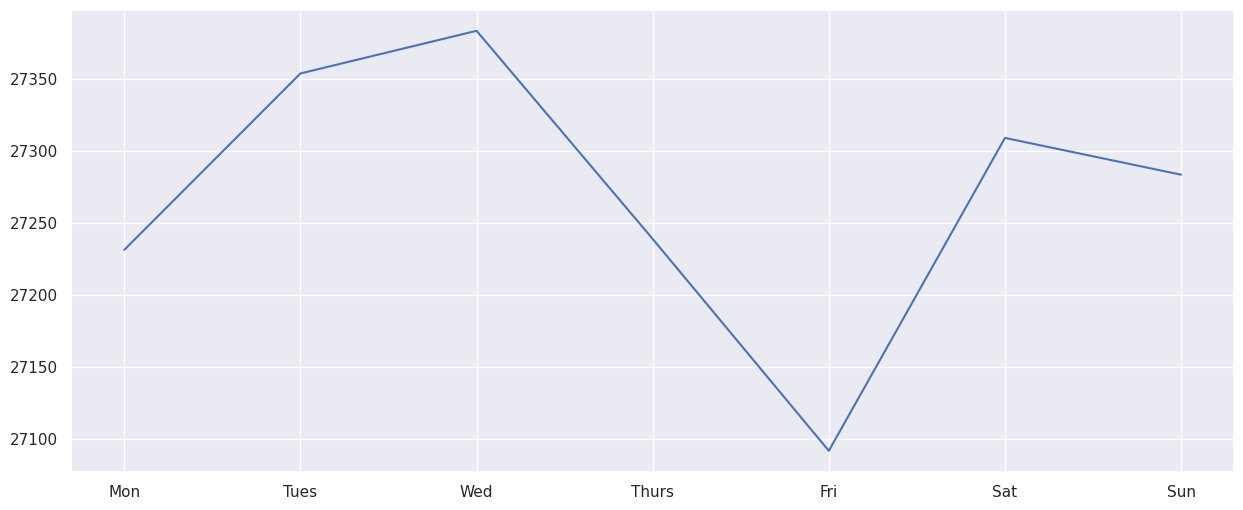

In [11]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

<AxesSubplot:xlabel='open_time'>

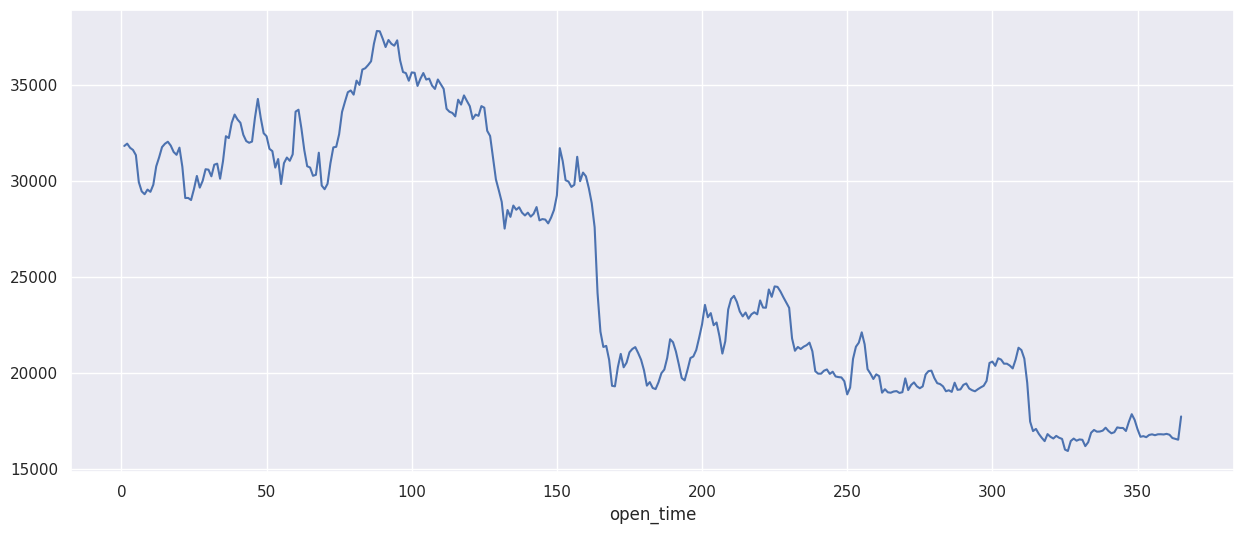

In [12]:
by_day = data.groupby(data.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='open_time'>

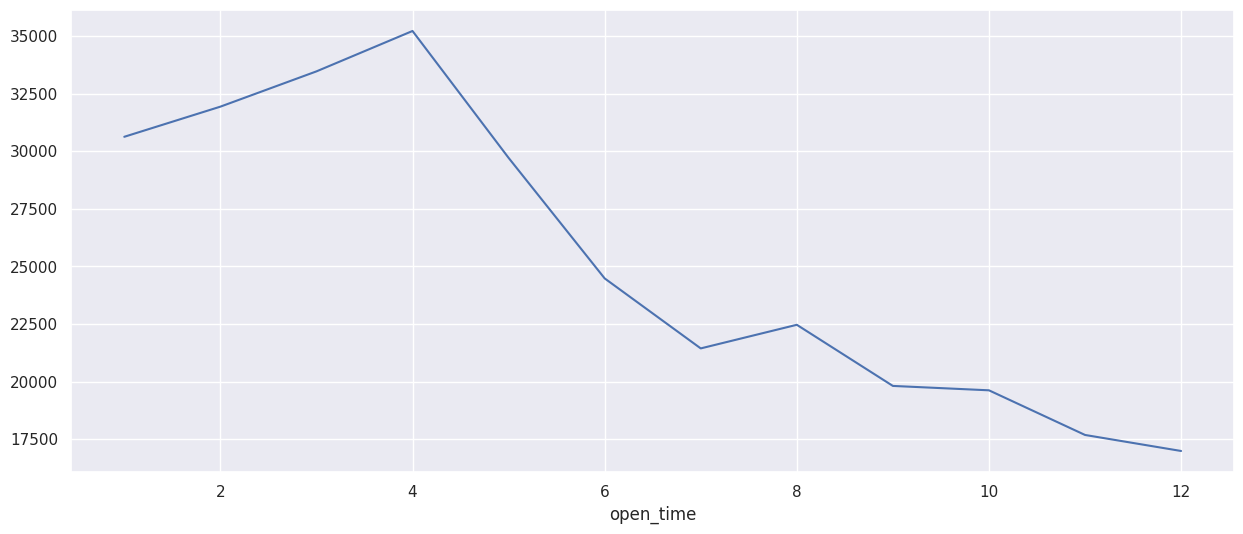

In [13]:
by_month = data.groupby(data.index.month).mean()
by_month.plot()

<AxesSubplot:title={'center':'Weekends'}, xlabel='open_time'>

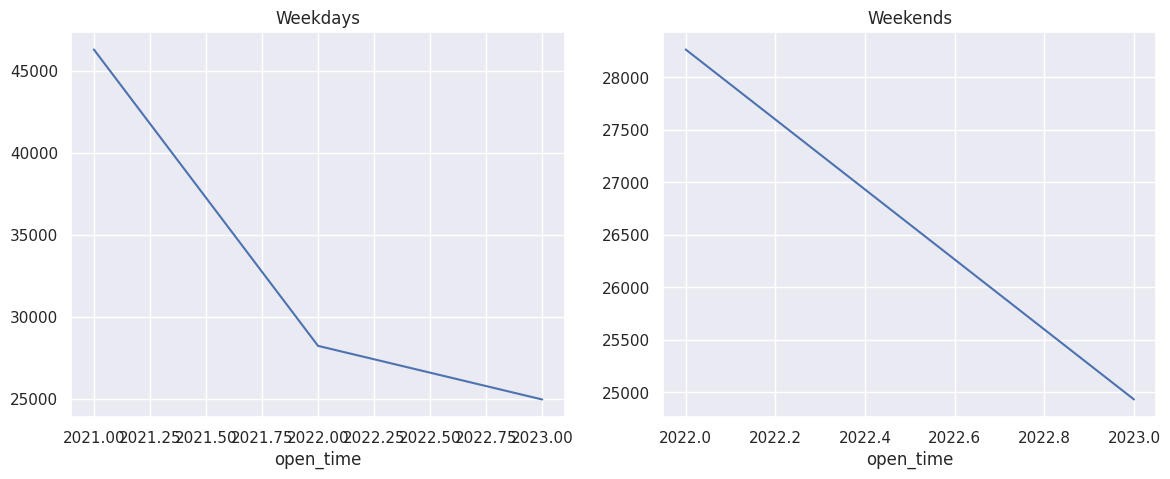

In [14]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

In [15]:
ts=data

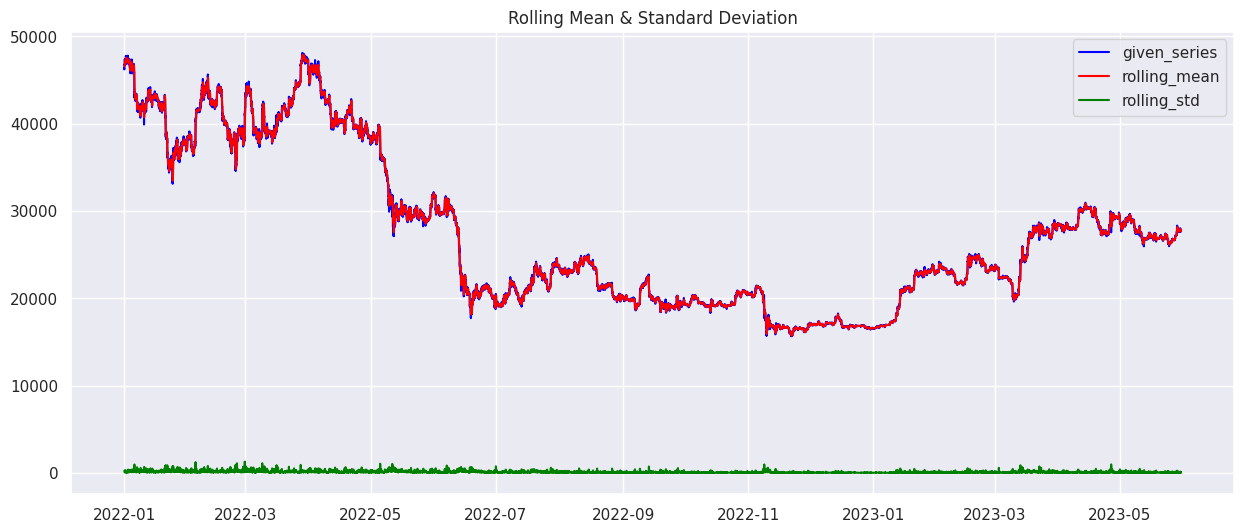

Results of Dickey-Fuller Test:
Test Statistic                    -2.276273
p-value                            0.179734
#Lags Used                        48.000000
Number of Observations Used    24668.000000
Critical Value (1%)               -3.430615
Critical Value (5%)               -2.861657
Critical Value (10%)              -2.566832
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(ts)   

Transforming the data - (to eliminate trend)

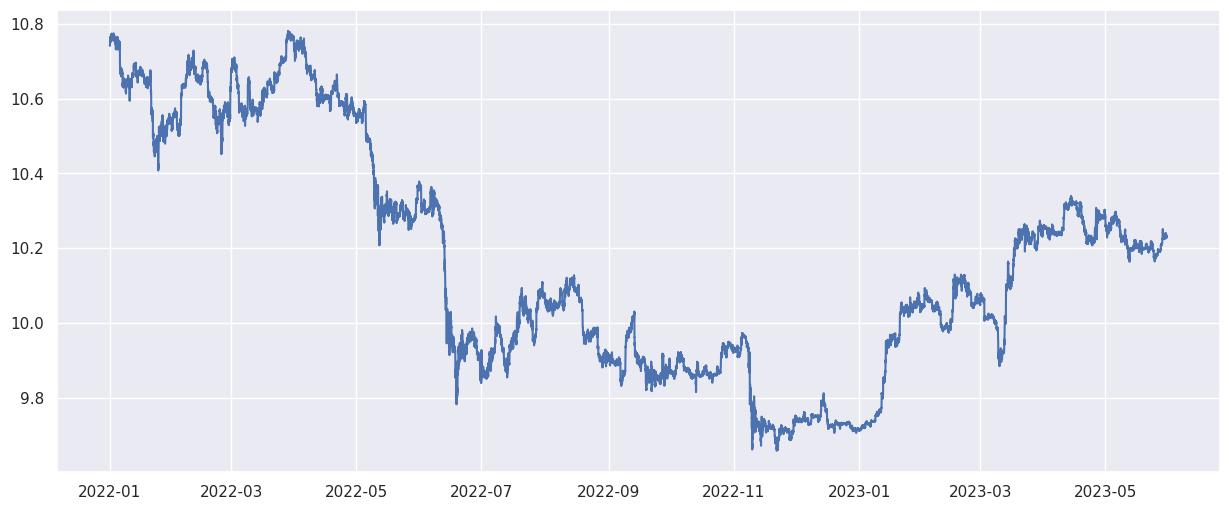

In [17]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [18]:
ts_logtransformed.head(10)


open_time
2021-12-31 23:00:00    10.743986
2021-12-31 23:30:00    10.741101
2022-01-01 00:00:00    10.744525
2022-01-01 00:30:00    10.750560
2022-01-01 01:00:00    10.753966
2022-01-01 01:30:00    10.753171
2022-01-01 02:00:00    10.754194
2022-01-01 02:30:00    10.753890
2022-01-01 03:00:00    10.753834
2022-01-01 03:30:00    10.753920
Name: close, dtype: float64

Smoothing by Rolling average

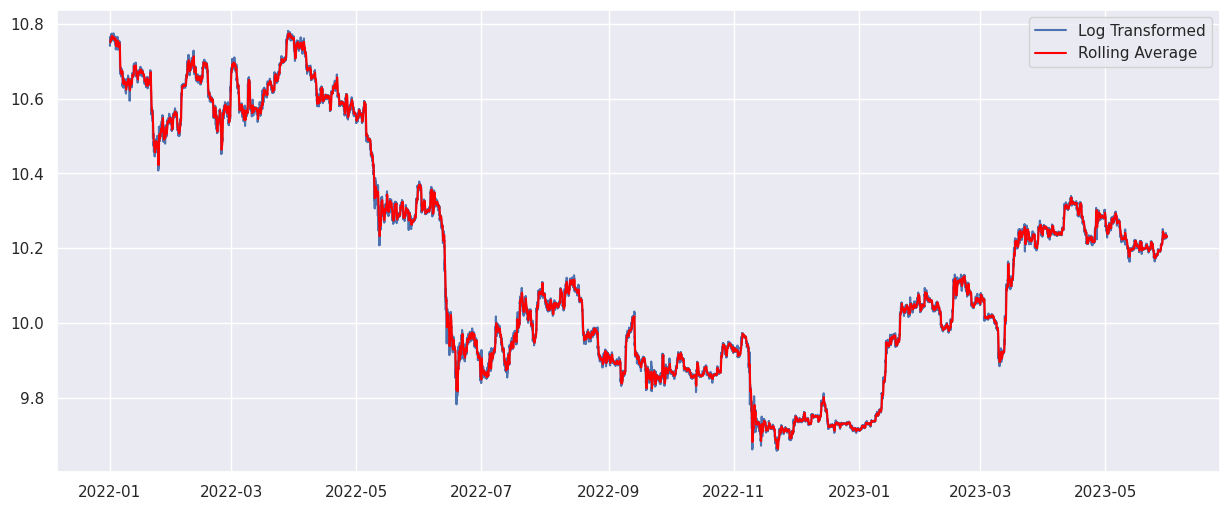

In [19]:
Rolling_average = ts_logtransformed.rolling(window = 12, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

In [20]:
Rolling_average.head(10)

open_time
2021-12-31 23:00:00   NaN
2021-12-31 23:30:00   NaN
2022-01-01 00:00:00   NaN
2022-01-01 00:30:00   NaN
2022-01-01 01:00:00   NaN
2022-01-01 01:30:00   NaN
2022-01-01 02:00:00   NaN
2022-01-01 02:30:00   NaN
2022-01-01 03:00:00   NaN
2022-01-01 03:30:00   NaN
Name: close, dtype: float64

In [21]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

open_time
2023-05-30 17:30:00   -0.002086
2023-05-30 18:00:00   -0.001289
2023-05-30 18:30:00    0.001426
2023-05-30 19:00:00    0.003112
2023-05-30 19:30:00    0.004766
2023-05-30 20:00:00    0.002787
2023-05-30 20:30:00    0.001116
2023-05-30 21:00:00    0.002734
2023-05-30 21:30:00   -0.001021
2023-05-30 22:00:00   -0.000927
Name: close, dtype: float64

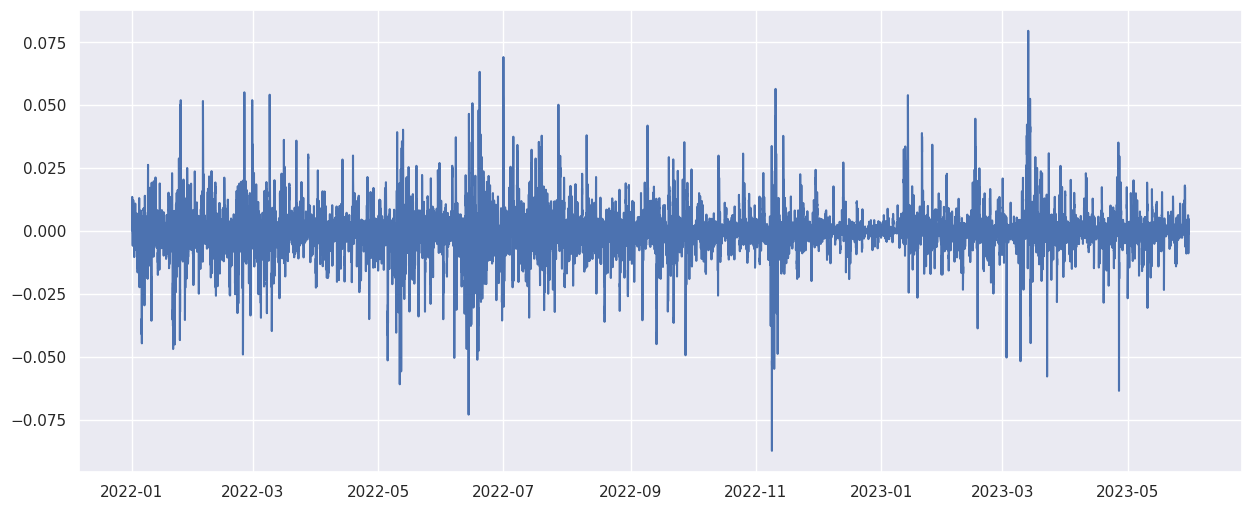

In [22]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

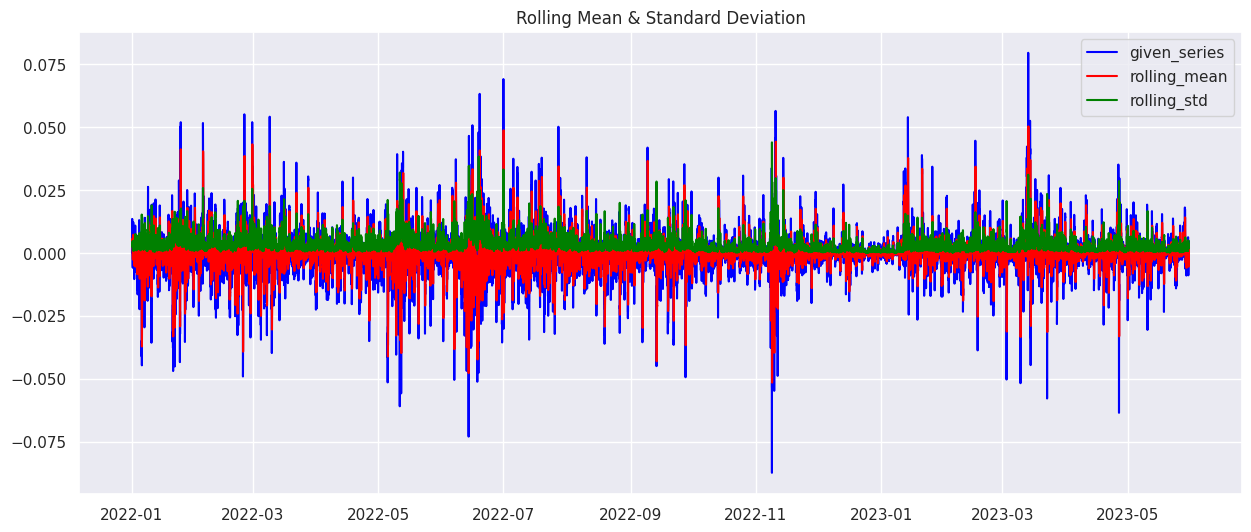

Results of Dickey-Fuller Test:
Test Statistic                   -22.003854
p-value                            0.000000
#Lags Used                        45.000000
Number of Observations Used    24660.000000
Critical Value (1%)               -3.430615
Critical Value (5%)               -2.861657
Critical Value (10%)              -2.566832
dtype: float64


In [23]:
test_for_stationary(log_Rolling_difference)

Use exponential_weighted_moving_average instead of moving average to improve the solution

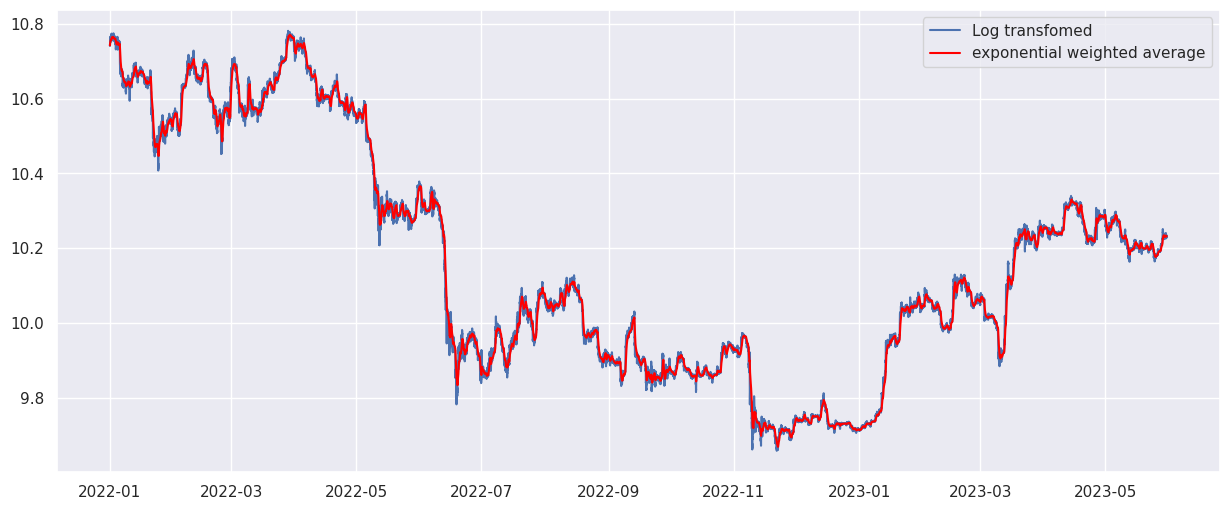

In [24]:
expwighted_avg = ts_logtransformed.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

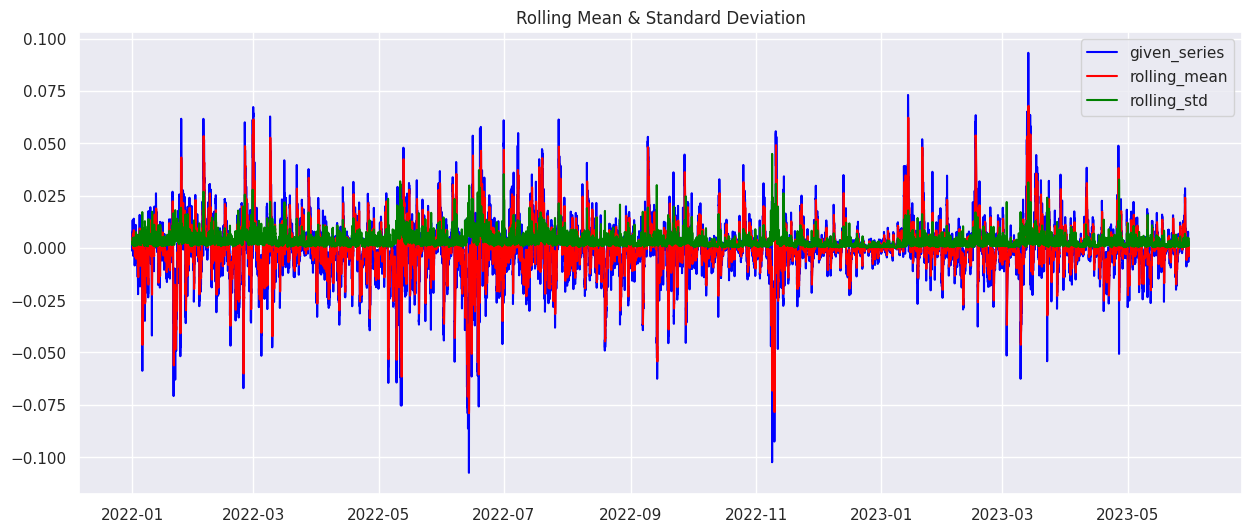

Results of Dickey-Fuller Test:
Test Statistic                -1.853133e+01
p-value                        2.102923e-30
#Lags Used                     4.500000e+01
Number of Observations Used    2.467100e+04
Critical Value (1%)           -3.430615e+00
Critical Value (5%)           -2.861657e+00
Critical Value (10%)          -2.566832e+00
dtype: float64


In [25]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

<AxesSubplot:xlabel='open_time'>

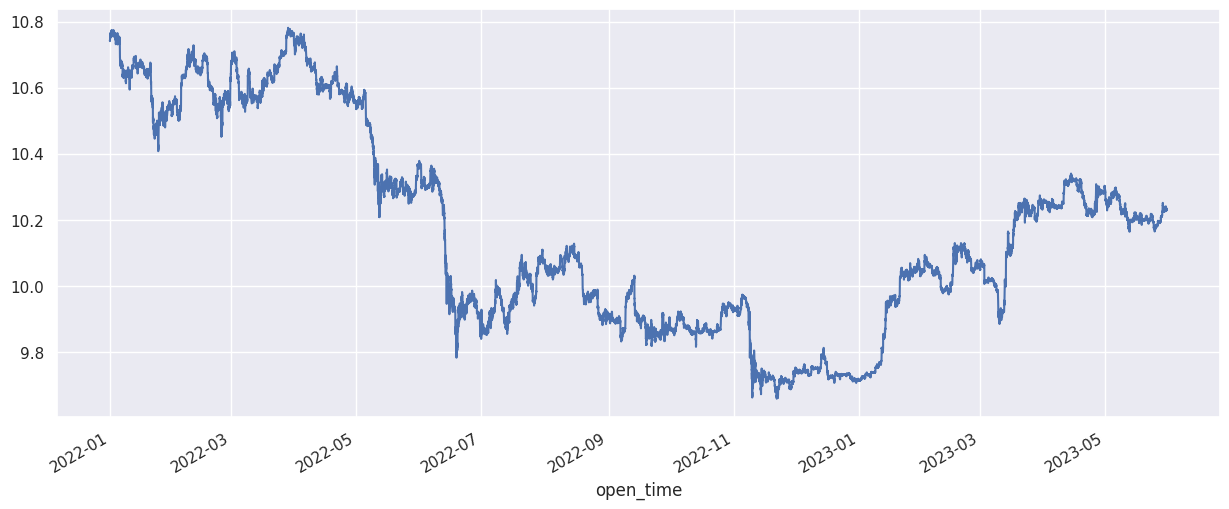

In [26]:
ts_logtransformed.plot()

Seasonality Adjustment by Differencing

open_time
2021-12-31 23:00:00         NaN
2021-12-31 23:30:00         NaN
2022-01-01 00:00:00         NaN
2022-01-01 00:30:00         NaN
2022-01-01 01:00:00         NaN
2022-01-01 01:30:00         NaN
2022-01-01 02:00:00         NaN
2022-01-01 02:30:00    0.009904
2022-01-01 03:00:00    0.012733
2022-01-01 03:30:00    0.009396
Name: close, dtype: float64

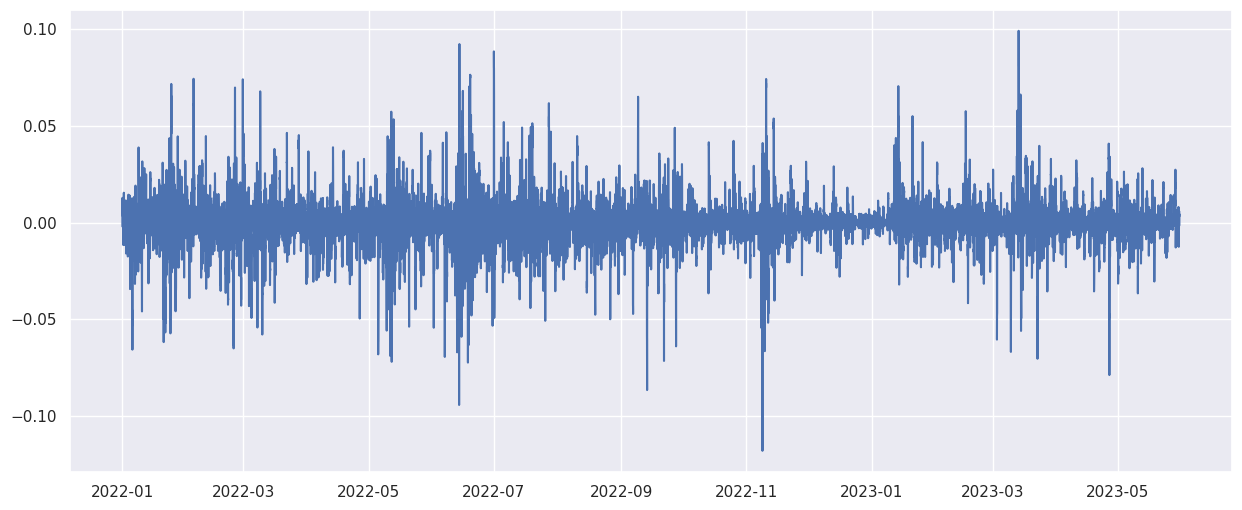

In [27]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

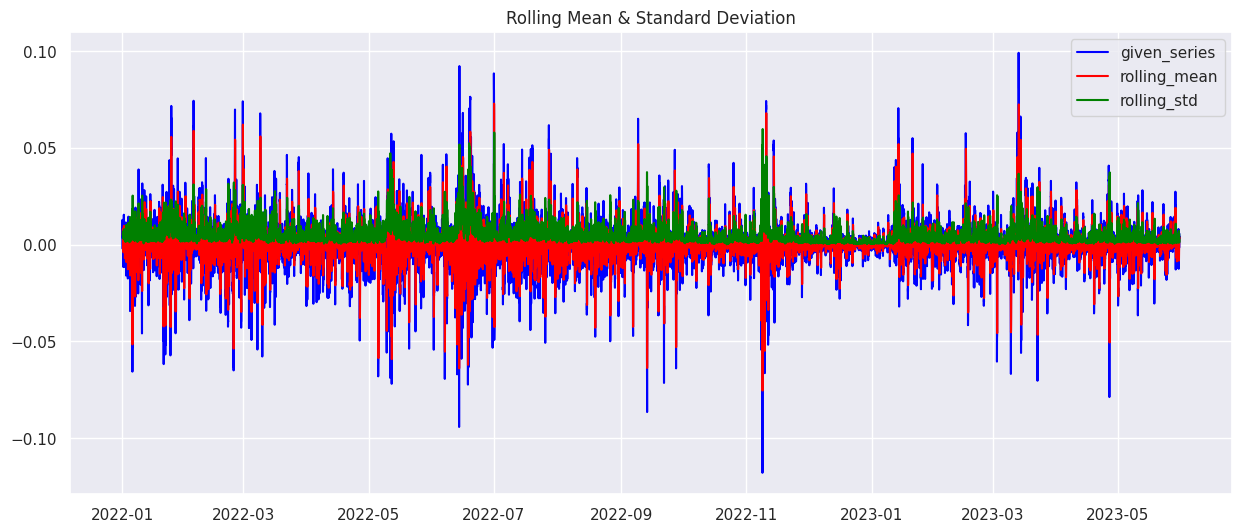

Results of Dickey-Fuller Test:
Test Statistic                   -22.742937
p-value                            0.000000
#Lags Used                        48.000000
Number of Observations Used    24661.000000
Critical Value (1%)               -3.430615
Critical Value (5%)               -2.861657
Critical Value (10%)              -2.566832
dtype: float64


In [28]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

Decomposing

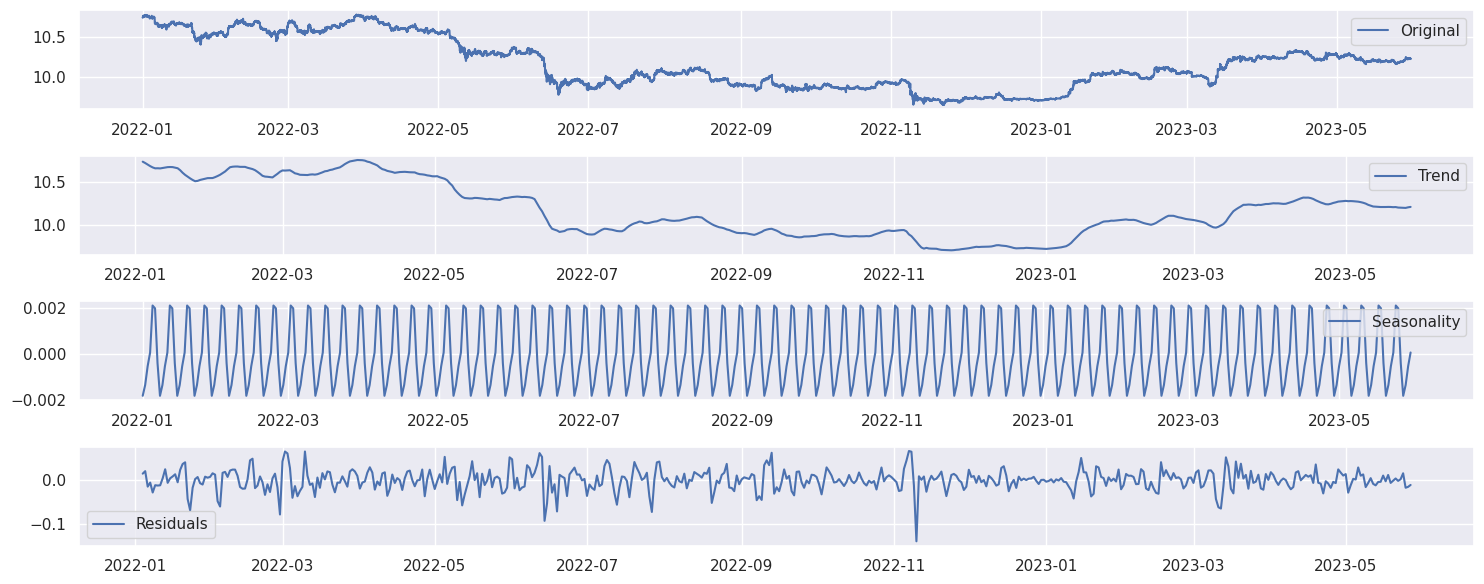

In [29]:
decomposition = seasonal_decompose(ts_logtransformed.asfreq(freq="D"))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

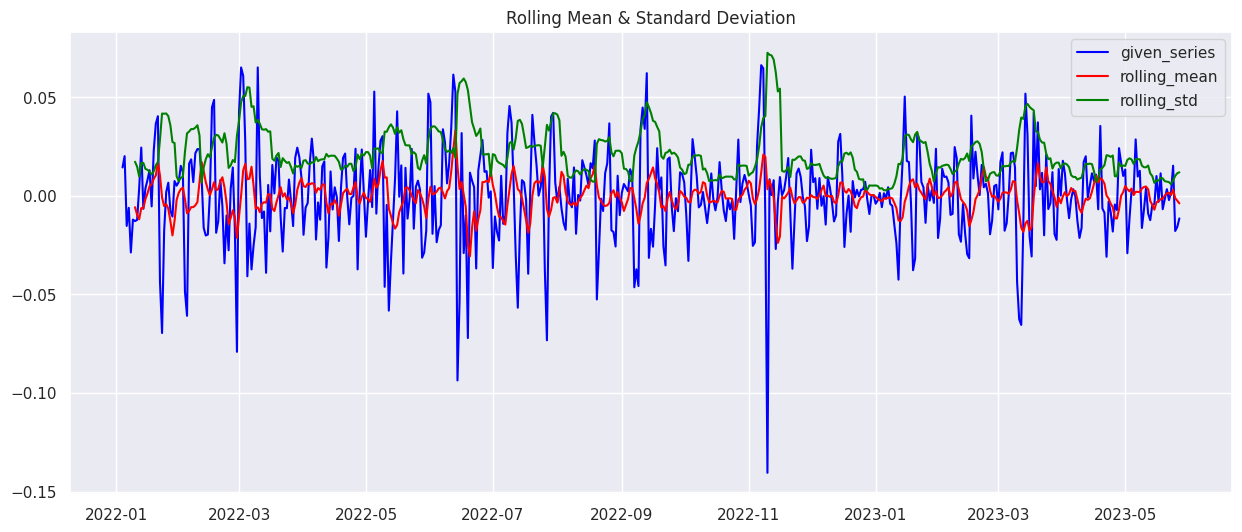

Results of Dickey-Fuller Test:
Test Statistic                -8.835589e+00
p-value                        1.722716e-14
#Lags Used                     1.500000e+01
Number of Observations Used    4.930000e+02
Critical Value (1%)           -3.443684e+00
Critical Value (5%)           -2.867420e+00
Critical Value (10%)          -2.569902e+00
dtype: float64


In [30]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

Forecasting

In [31]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=20)
lag_pacf = pacf(ts_diff_logtrans, nlags=20, method='ols')

/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


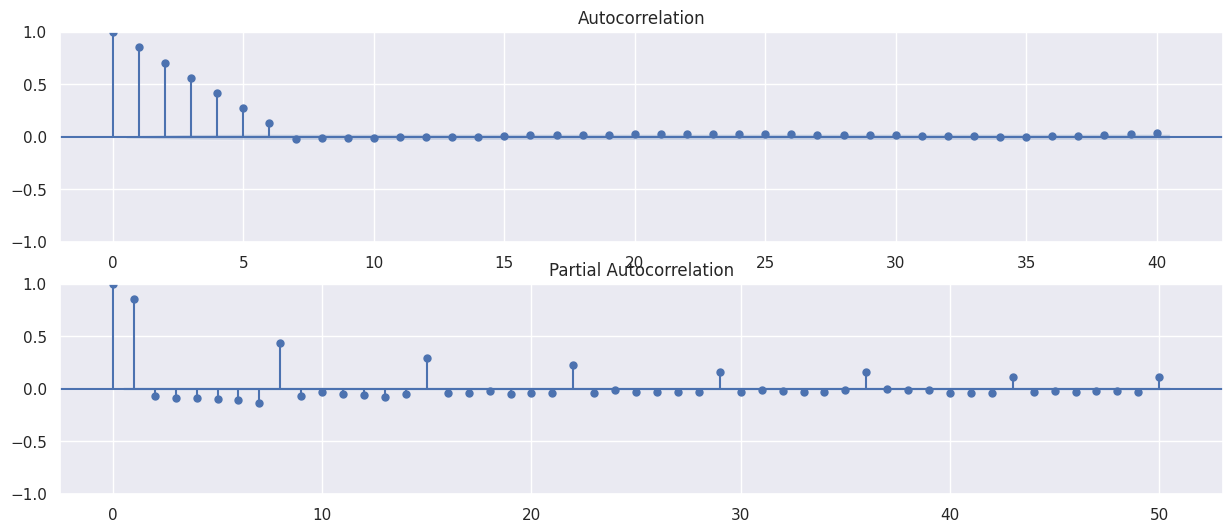

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

Preparing the model:

In [33]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

In [34]:
ts_diff_logtrans

open_time
2022-01-01 02:30:00    0.009904
2022-01-01 03:00:00    0.012733
2022-01-01 03:30:00    0.009396
2022-01-01 04:00:00    0.001114
2022-01-01 04:30:00   -0.002230
                         ...   
2023-05-30 20:00:00    0.003020
2023-05-30 20:30:00    0.003697
2023-05-30 21:00:00    0.004455
2023-05-30 21:30:00    0.000628
2023-05-30 22:00:00   -0.001464
Name: close, Length: 24710, dtype: float64

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [36]:
train_data, test_data= split_data(ts_diff_logtrans)

In [37]:
train_data

open_time
2022-01-01 02:30:00    0.009904
2022-01-01 03:00:00    0.012733
2022-01-01 03:30:00    0.009396
2022-01-01 04:00:00    0.001114
2022-01-01 04:30:00   -0.002230
                         ...   
2023-02-16 20:00:00   -0.017197
2023-02-16 20:30:00   -0.011229
2023-02-16 21:00:00   -0.016751
2023-02-16 21:30:00   -0.013899
2023-02-16 22:00:00   -0.024881
Name: close, Length: 19768, dtype: float64

In [38]:
test_data

open_time
2023-02-16 22:30:00   -0.036401
2023-02-16 23:00:00   -0.041687
2023-02-16 23:30:00   -0.039854
2023-02-17 00:00:00   -0.038820
2023-02-17 00:30:00   -0.031751
                         ...   
2023-05-30 20:00:00    0.003020
2023-05-30 20:30:00    0.003697
2023-05-30 21:00:00    0.004455
2023-05-30 21:30:00    0.000628
2023-05-30 22:00:00   -0.001464
Name: close, Length: 4942, dtype: float64

In [39]:
#best parameters
model = pm.auto_arima(ts_diff_logtrans,
                       start_p=0, max_p=7,
                       start_q=0, max_q=7,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-148675.192, Time=5.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-180720.207, Time=6.78 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-148864.536, Time=7.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-180847.030, Time=9.69 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-181044.166, Time=14.36 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-181234.720, Time=18.43 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-181478.636, Time=24.73 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=-181772.044, Time=27.74 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=-182236.017, Time=34.00 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=-182869.442, Time=37.45 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=-181361.517, Time=30.99 sec
 ARIMA(7,0,2)(0,0,0)[0]             : AIC=-183035.151, Time=39.86 sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=-181366.742, Time=33.10 sec


/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(7,0,3)(0,0,0)[0]             : AIC=-93427.315, Time=42.81 sec


/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(6,0,3)(0,0,0)[0]             : AIC=-93429.315, Time=36.88 sec
 ARIMA(7,0,2)(0,0,0)[0] intercept   : AIC=-183035.151, Time=40.12 sec

Best model:  ARIMA(7,0,2)(0,0,0)[0]          
Total fit time: 409.740 seconds


In [43]:
from statsmodels.tsa.arima.model import ARIMA
arima = ARIMA(train_data, order=(7,0,2), trend='t')  
arima = arima.fit()

## Forecast
# Forecast values
forecast = arima.forecast(len(test_data), alpha=0.05)  # 95% confidence

# Forecast values and confidence intervals
forecast_results = arima.get_forecast(len(test_data), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)
/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)
/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)
/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [71]:
forecast

2023-02-16 22:30:00   -0.019270
2023-02-16 23:00:00   -0.017533
2023-02-16 23:30:00   -0.012582
2023-02-17 00:00:00   -0.010007
2023-02-17 00:30:00   -0.006320
                         ...   
2023-05-30 19:00:00   -0.000062
2023-05-30 19:30:00   -0.000062
2023-05-30 20:00:00   -0.000062
2023-05-30 20:30:00   -0.000062
2023-05-30 21:00:00   -0.000062
Freq: 30T, Name: predicted_mean, Length: 4942, dtype: float64

In [63]:
forecast_conv=forecast.cumsum()
forecast_conv

2023-02-16 22:30:00   -0.019270
2023-02-16 23:00:00   -0.036803
2023-02-16 23:30:00   -0.049385
2023-02-17 00:00:00   -0.059391
2023-02-17 00:30:00   -0.065711
                         ...   
2023-05-30 19:00:00   -0.320193
2023-05-30 19:30:00   -0.320255
2023-05-30 20:00:00   -0.320317
2023-05-30 20:30:00   -0.320378
2023-05-30 21:00:00   -0.320440
Freq: 30T, Name: predicted_mean, Length: 4942, dtype: float64

In [73]:
ts_logtransformed

open_time
2021-12-31 23:00:00    10.743986
2021-12-31 23:30:00    10.741101
2022-01-01 00:00:00    10.744525
2022-01-01 00:30:00    10.750560
2022-01-01 01:00:00    10.753966
                         ...    
2023-05-30 20:00:00    10.232692
2023-05-30 20:30:00    10.231442
2023-05-30 21:00:00    10.233503
2023-05-30 21:30:00    10.229887
2023-05-30 22:00:00    10.230097
Name: close, Length: 24717, dtype: float64

: 

In [70]:
forecast_conv_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
forecast_conv_log = forecast_conv_log.add(forecast_conv,fill_value=0)
forecast_conv_log

2021-12-31 23:00:00    10.743986
2021-12-31 23:30:00    10.743986
2022-01-01 00:00:00    10.743986
2022-01-01 00:30:00    10.743986
2022-01-01 01:00:00    10.743986
                         ...    
2023-05-30 20:00:00    10.423669
2023-05-30 20:30:00    10.423608
2023-05-30 21:00:00    10.423546
2023-05-30 21:30:00    10.743986
2023-05-30 22:00:00    10.743986
Length: 24719, dtype: float64

/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


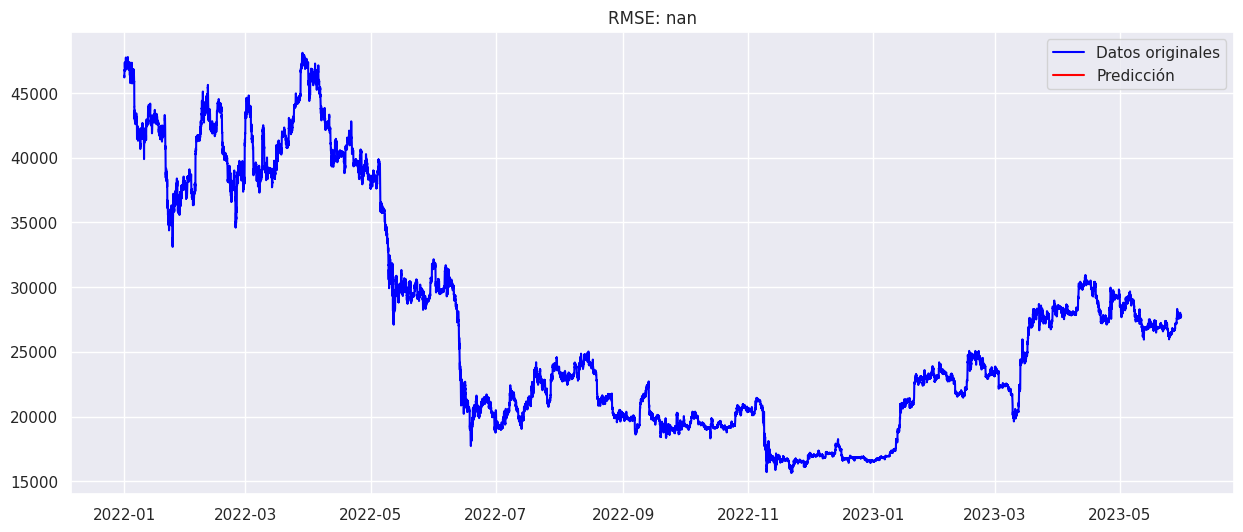

In [69]:
forecast_conv_log = np.exp(forecast_conv_log)
plt.plot(data, color='blue', label='Datos originales')
plt.plot(forecast_conv_log, color='red', label='Predicción')
plt.title('RMSE: %.4f' % np.sqrt(sum((forecast_conv_log - data) ** 2) / len(data)))
plt.legend(loc='best')


In [72]:
forecast_conv_log

2021-12-31 23:00:00    10.743986
2021-12-31 23:30:00    10.743986
2022-01-01 00:00:00    10.743986
2022-01-01 00:30:00    10.743986
2022-01-01 01:00:00    10.743986
                         ...    
2023-05-30 20:00:00    10.423669
2023-05-30 20:30:00    10.423608
2023-05-30 21:00:00    10.423546
2023-05-30 21:30:00    10.743986
2023-05-30 22:00:00    10.743986
Length: 24719, dtype: float64

In [56]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    #plt.plot(test, label='actual', color='black', ls='--')
    #plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

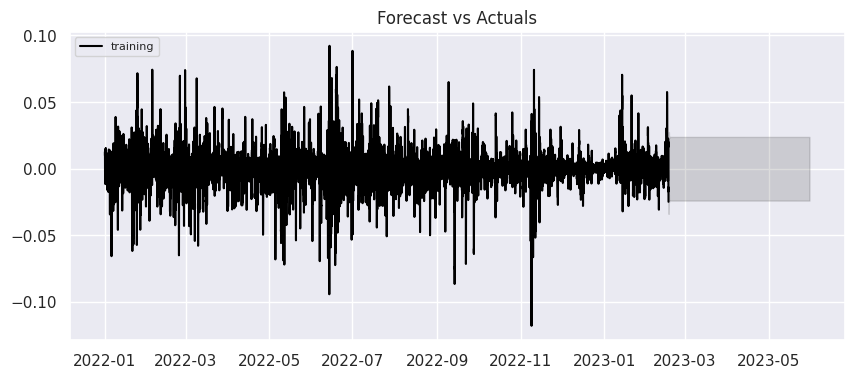

In [57]:
plot_forecast(forecast, train_data, test_data, confidence_int[:,0], confidence_int[:,1])